In [1]:
import pickle
import random
import time
import os

import pandas as pd
import numpy as np
from tqdm import tqdm

import torch
from matplotlib import pyplot as plt
import soundfile as sf
import librosa
import librosa.display

tqdm.pandas()

import paule
import util
from util import (speak, normalize_cp, inv_normalize_cp, normalize_mel_librosa, inv_normalize_mel_librosa, stereo_to_mono, librosa_melspec, pad_same_to_even_seq_length, RMSELoss, mel_to_sig, pad_batch_online)
from models import *
from matplotlib import cm
from matplotlib.lines import Line2D

DIR = os.getcwd()
DEVICE = torch.device('cpu')

/Users/paule/anaconda3/envs/bonn17/lib/python3.8/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
DATA_DIR = "/Volumes/T7/Common_Voice/data/"
RESULT_DICT = "/Volumes/T7/Common_Voice/common_voice_test_planning"
SAVE_DICT = "/Volumes/T7/Common_Voice/common_voice_test_planning/results_acoustic_lr_001_lr_model_00001_5_outer_25_inner_3_batches_10_epochs_only_new"

# Initialize Paule

In [3]:
paule_model = paule.Paule(device=DEVICE)

# Prepare Test Data

In [13]:
test_data = pd.read_pickle(DATA_DIR + "common_voice_geco_words_test_subset_slim_prot4.pkl")

## Create Flac Files 

In [ ]:
"""
for i,row in test_data.iterrows():
    sr = 48000
    sig = row.wav_rec
    file_name = row.file_name
    label = row.label
    
    path = RESULT_DICT + label + "/"
    if os.path.isdir(path):
        file = path +  file_name + "_" + label + ".flac"
        if file.is_file():
            j = 1
            while file.is_file(): 
                file = path +  file_name + "_" + label + "%d.flac" % j
                j+=1
        sf.write(path +  file_name + "_" + label + "3.flac" ,sig, sr)
    else:
        os.mkdir(path)
        sf.write(path +  file_name + "_" + label + ".flac" ,sig, sr)
"""

## Random Shuffle Files

In [4]:
files = []
for dic in os.listdir(RESULT_DICT):
    if (".DS_Store" in dic) or ("results" in dic) : # .DS_Store stores custom attributes of its containing folder in macOS
        continue
    else:
        if not os.path.isdir(os.path.join(SAVE_DICT, dic)):
            os.mkdir(os.path.join(SAVE_DICT, dic))
        path = os.path.join(RESULT_DICT, dic)
        for file in os.listdir(path):
            if (".DS_Store" in file) or ("._" in file):
                continue
            else:
                file = os.path.join(path,file)
                files.append(file)
random.seed(30112021)
random.shuffle(files)

### Omit already planned files

In [5]:
already_planned_files = []
for dic in os.listdir(SAVE_DICT):
    if ".DS_Store" in dic:
        continue
    else:
        path = os.path.join(SAVE_DICT,dic)
        if os.path.isdir(path):
            for file in os.listdir(path):
                if "planned" in file: 
                    planned_file = "_".join(file.split("_")[:-1]) + ".flac" 
                    already_planned_files.append(planned_file)

unplanned_files = [file for file in files if file.split("/")[-1] not in already_planned_files]

### Load predictive model already used and further learned during planning 

In [6]:
# load model
pred_model = torch.load("/Volumes/T7/Common_Voice/common_voice_test_planning/results_acoustic_lr_001_lr_model_00001_5_outer_25_inner_3_batches_10_epochs_only_new/aber/common_voice_de_18747673_aber_pred_model.pt", map_location=DEVICE)
optimizer = torch.load("/Volumes/T7/Common_Voice/common_voice_test_planning/results_acoustic_lr_001_lr_model_00001_5_outer_25_inner_3_batches_10_epochs_only_new/aber/common_voice_de_18747673_aber_pred_optimizer.pt", map_location=DEVICE)

In [10]:
paule_model.pred_model = pred_model
paule_model.pred_optimizer = optimizer

In [8]:
len(unplanned_files)

57

In [9]:
len(already_planned_files)

168

# Start Planning and store results 

In [ ]:
fontsize_title = 20
fontsize_x = 20
fontsize_y = 20
fontsize_params = 15

  0%|          | 0/5 [00:00<?, ?it/s]

Iteration 0
Planned Loss:  0.2000897337234089
Mel Loss:  0.15850511612000132
Vel Loss:  0.03468231996660511
Jerk Loss:  0.006902297636802463
Semvec Loss:  0.01403953358707961
Produced Mel Loss:  0.1697217469258766
Produced Semvec Loss:  0.009736925046105327

Iteration 1
Planned Loss:  0.22874793782984423
Mel Loss:  0.14820706607871895
Vel Loss:  0.03773496826538542
Jerk Loss:  0.042805903485739864
Semvec Loss:  0.01269995026587773
Produced Mel Loss:  0.16170519454799645
Produced Semvec Loss:  0.009541075689966736

Iteration 2
Planned Loss:  0.2127223124298184
Mel Loss:  0.14331852122492184
Vel Loss:  0.03691825987448363
Jerk Loss:  0.03248553133041293
Semvec Loss:  0.009651285834829295
Produced Mel Loss:  0.15464332284361312
Produced Semvec Loss:  0.01015687174530612

Iteration 3
Planned Loss:  0.2051415152084762
Mel Loss:  0.13862335652360783
Vel Loss:  0.03623466120915876
Jerk Loss:  0.03028349747570961
Semvec Loss:  0.00862027766550566
Produced Mel Loss:  0.15644198115363078
Produce

/Users/paule/anaconda3/envs/bonn17/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/paule/anaconda3/envs/bonn17/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
 20%|██        | 1/5 [02:59<11:58, 179.68s/it]

Iteration 0
Planned Loss:  0.15123069099611292
Mel Loss:  0.11197841678605058
Vel Loss:  0.031674707530385496
Jerk Loss:  0.007577566679676845
Semvec Loss:  0.009400346034867406
Produced Mel Loss:  0.15009680617506643
Produced Semvec Loss:  0.014369321518028215

Iteration 1
Planned Loss:  0.15023921031457593
Mel Loss:  0.11144191341628387
Vel Loss:  0.031513204169661094
Jerk Loss:  0.007284092728630949
Semvec Loss:  0.009934715433568459
Produced Mel Loss:  0.14993721139235455
Produced Semvec Loss:  0.014033086868367775

Iteration 2
Planned Loss:  0.14938554572866602
Mel Loss:  0.11100778641923872
Vel Loss:  0.031356652873693505
Jerk Loss:  0.007021106435733783
Semvec Loss:  0.010413271242570524
Produced Mel Loss:  0.15035212172916607
Produced Semvec Loss:  0.01341285664756243

Iteration 3
Planned Loss:  0.14856590180971305
Mel Loss:  0.1106228902032567
Vel Loss:  0.03120187954617
Jerk Loss:  0.006741132060286344
Semvec Loss:  0.010814750367470838
Produced Mel Loss:  0.14873974094888656

 40%|████      | 2/5 [06:02<09:01, 180.65s/it]

Iteration 0
Planned Loss:  0.13879648843882292
Mel Loss:  0.10556451661833709
Vel Loss:  0.028743463330598903
Jerk Loss:  0.004488508489886943
Semvec Loss:  0.011544993189271852
Produced Mel Loss:  0.14476064611968434
Produced Semvec Loss:  0.013238410017650396

Iteration 1
Planned Loss:  0.13841991963936776
Mel Loss:  0.1054105760396018
Vel Loss:  0.028656252661527853
Jerk Loss:  0.004353090938238114
Semvec Loss:  0.011425569849319722
Produced Mel Loss:  0.1445055182507274
Produced Semvec Loss:  0.014415174512160447

Iteration 2
Planned Loss:  0.1381408402265002
Mel Loss:  0.10527204592790561
Vel Loss:  0.02856878325388678
Jerk Loss:  0.004300011044707801
Semvec Loss:  0.01136796067426992
Produced Mel Loss:  0.14277633239032242
Produced Semvec Loss:  0.013602252556267284

Iteration 3
Planned Loss:  0.13784246568365685
Mel Loss:  0.10512544707499212
Vel Loss:  0.02848339642614054
Jerk Loss:  0.0042336221825241774
Semvec Loss:  0.011409940165717013
Produced Mel Loss:  0.1452627576121022

 60%|██████    | 3/5 [08:50<05:53, 176.81s/it]

Iteration 0
Planned Loss:  0.13348403165852796
Mel Loss:  0.10279587888103398
Vel Loss:  0.02699620858758638
Jerk Loss:  0.0036919441899075853
Semvec Loss:  0.011737600179158493
Produced Mel Loss:  0.14090921556693792
Produced Semvec Loss:  0.014698318653335811

Iteration 1
Planned Loss:  0.1335196980681603
Mel Loss:  0.10270426402355222
Vel Loss:  0.026945094755639547
Jerk Loss:  0.003870339288968533
Semvec Loss:  0.011761152204205098
Produced Mel Loss:  0.13979347640093281
Produced Semvec Loss:  0.014389234814315952

Iteration 2
Planned Loss:  0.13308552961313336
Mel Loss:  0.10262688424898546
Vel Loss:  0.026887384365230582
Jerk Loss:  0.003571260998917309
Semvec Loss:  0.011819347434991648
Produced Mel Loss:  0.13925344539949844
Produced Semvec Loss:  0.01516425942541147

Iteration 3
Planned Loss:  0.133335675108231
Mel Loss:  0.10254631627342958
Vel Loss:  0.026840863989041244
Jerk Loss:  0.003948494845760186
Semvec Loss:  0.011880165277245619
Produced Mel Loss:  0.140131229270500

 80%|████████  | 4/5 [11:43<02:55, 175.71s/it]

Iteration 0
Planned Loss:  0.13031820389568147
Mel Loss:  0.10103577802410806
Vel Loss:  0.025818214891087772
Jerk Loss:  0.0034642109804856255
Semvec Loss:  0.012050712387140715
Produced Mel Loss:  0.13649666306587194
Produced Semvec Loss:  0.01238049823688861

Iteration 1
Planned Loss:  0.13033516954995478
Mel Loss:  0.10097177496563967
Vel Loss:  0.025780182546595653
Jerk Loss:  0.0035832120377194817
Semvec Loss:  0.01203731060772438
Produced Mel Loss:  0.1362929398375696
Produced Semvec Loss:  0.012205059897699228

Iteration 2
Planned Loss:  0.13034359381763108
Mel Loss:  0.1009188768970062
Vel Loss:  0.025741590703722866
Jerk Loss:  0.0036831262169020017
Semvec Loss:  0.012016171678265426
Produced Mel Loss:  0.1357384488288572
Produced Semvec Loss:  0.013009679775003011

Iteration 3
Planned Loss:  0.12997758307985285
Mel Loss:  0.10085484906440968
Vel Loss:  0.02569889912642605
Jerk Loss:  0.003423834889017137
Semvec Loss:  0.012016722136252822
Produced Mel Loss:  0.13599281576747

100%|██████████| 5/5 [14:21<00:00, 172.36s/it]


--- 14.37 min ---


AttributeError: 'PlanningResults' object has no attribute 'inital_cp'

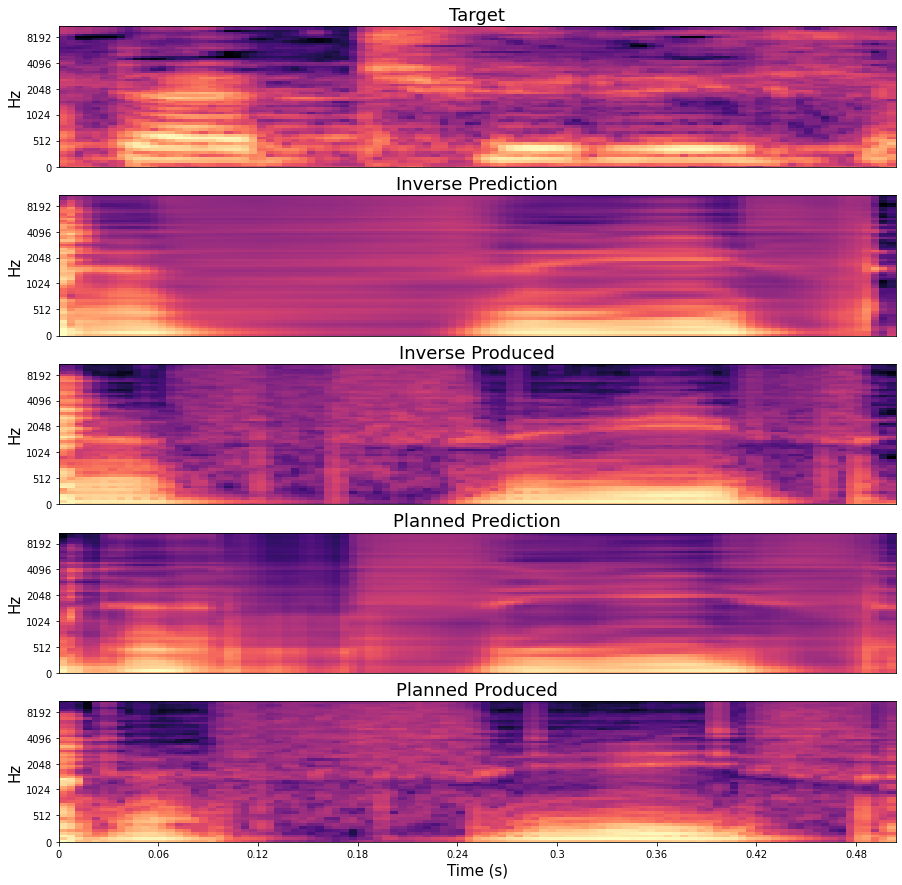

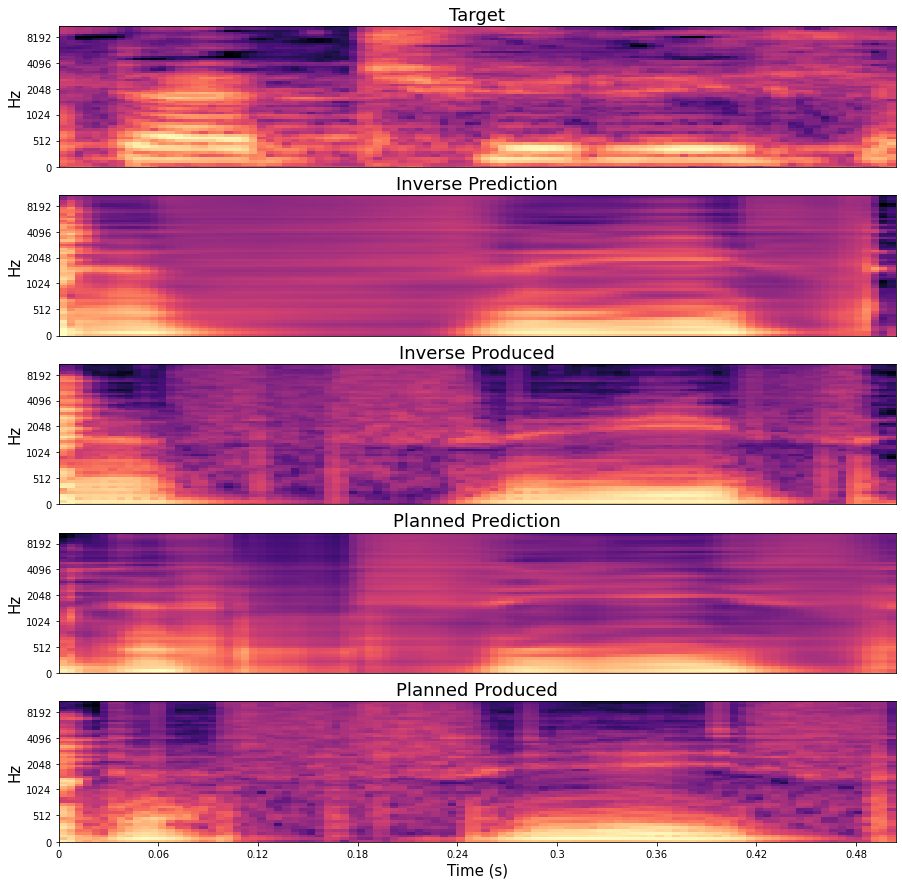

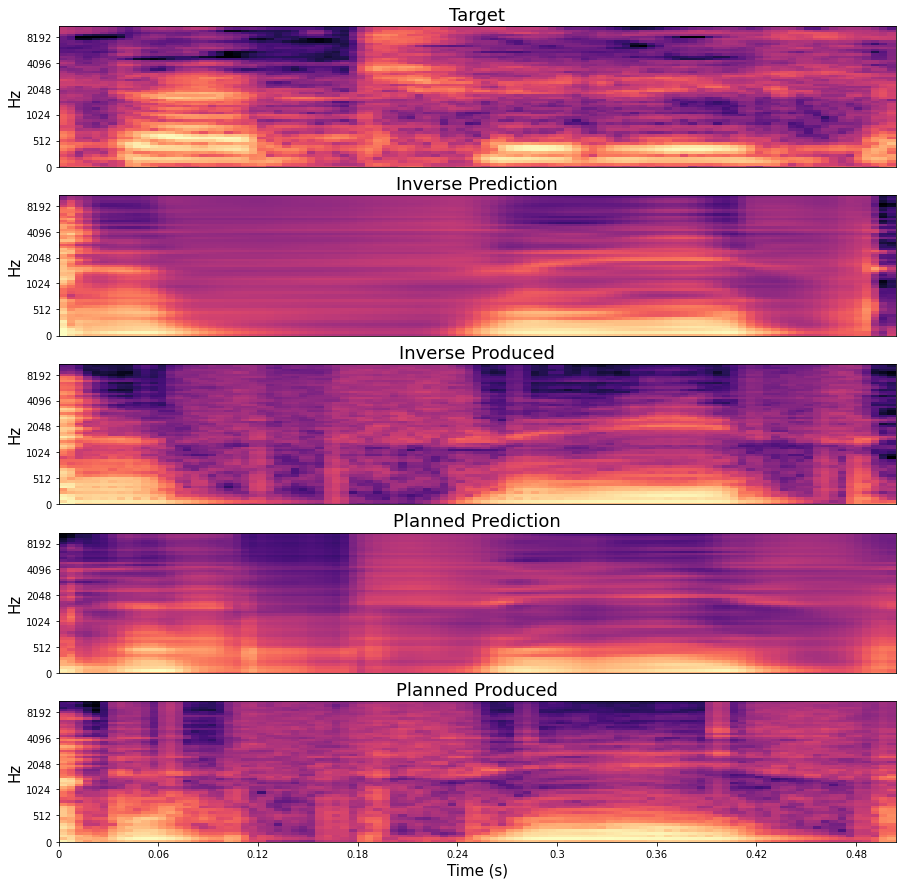

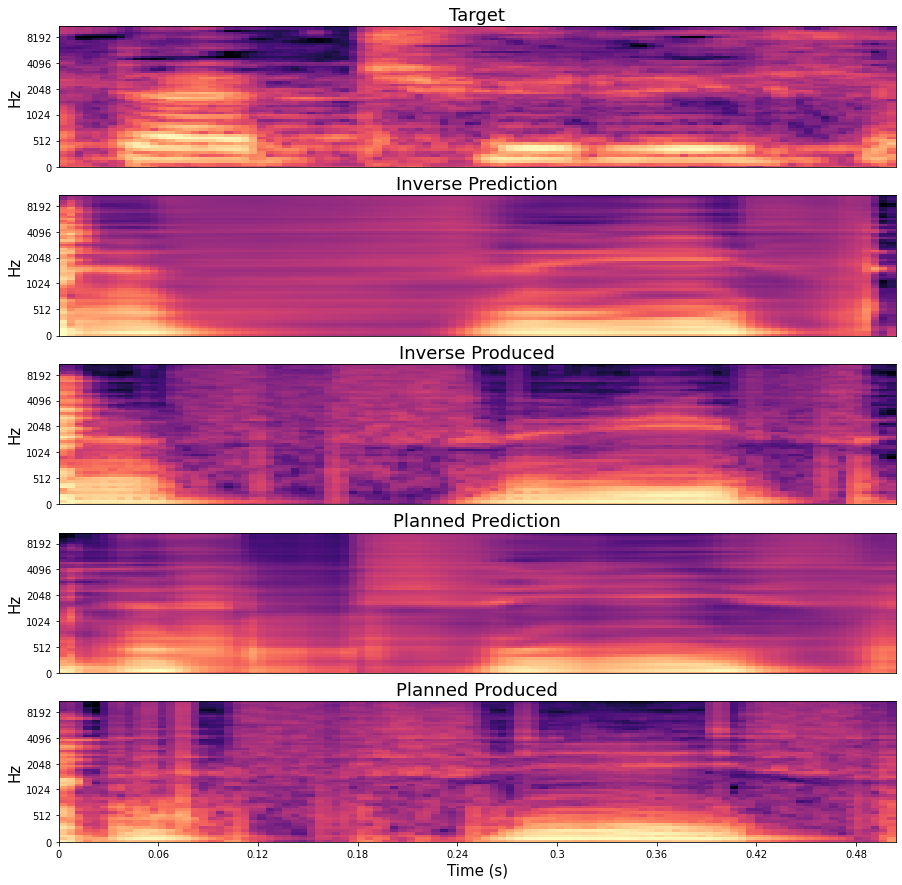

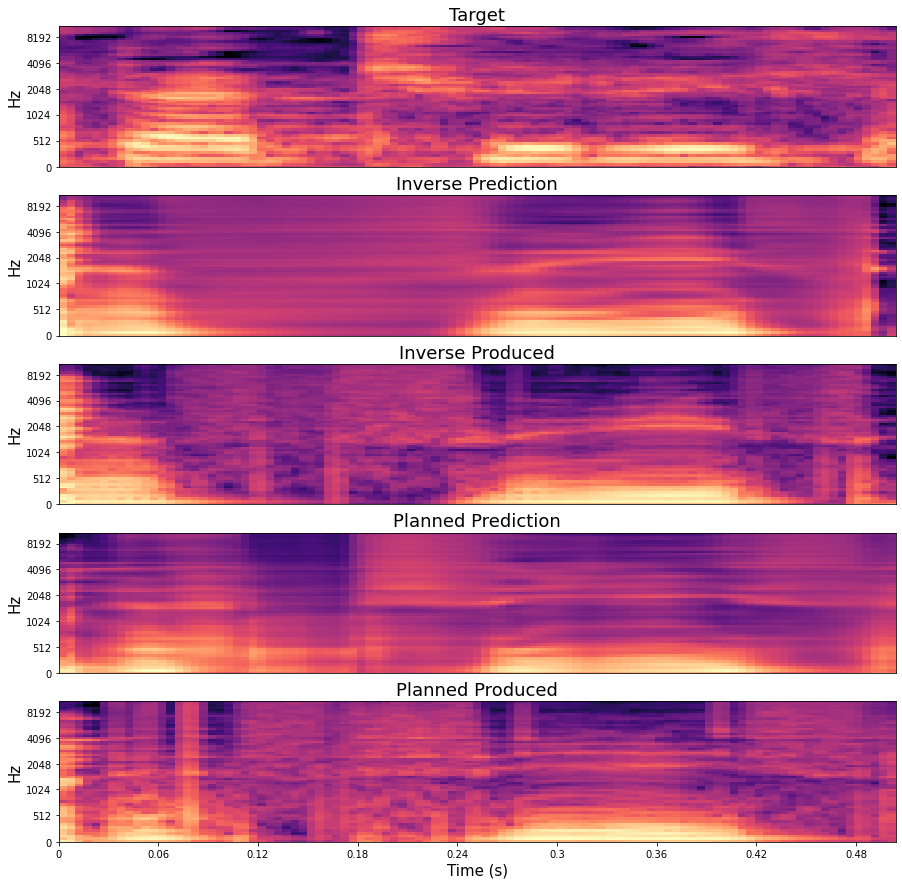

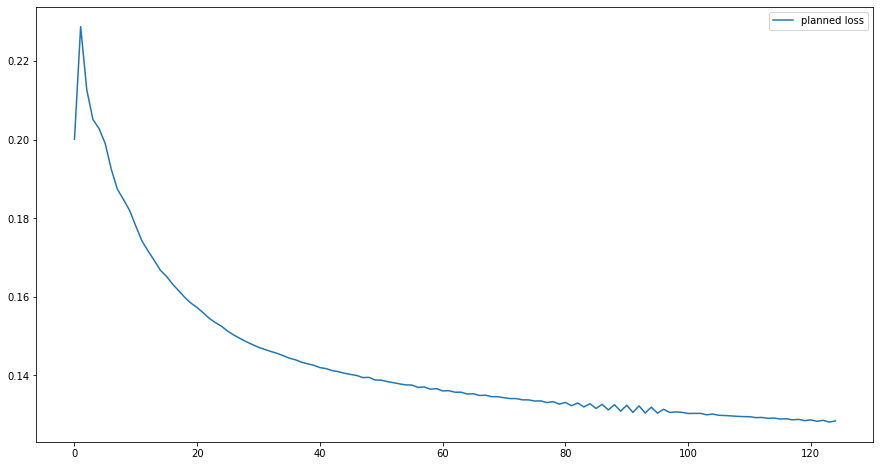

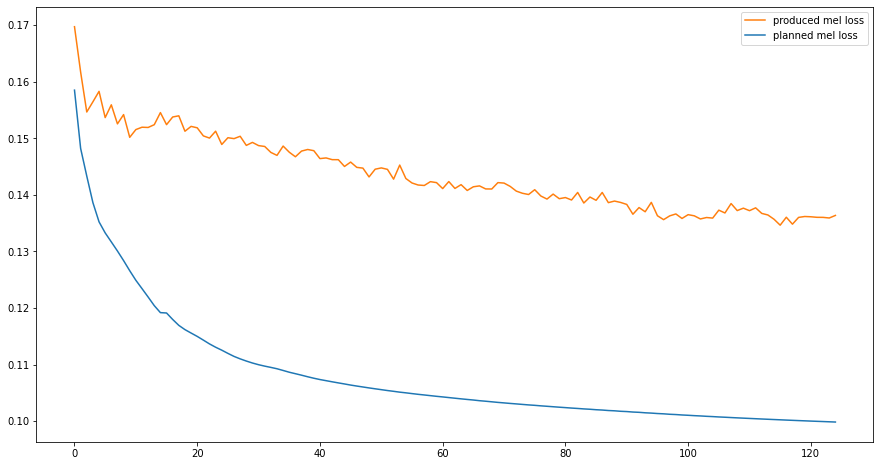

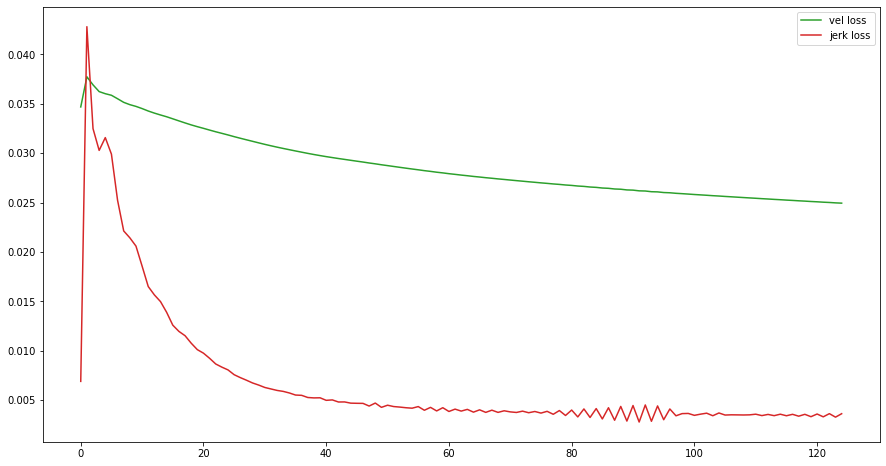

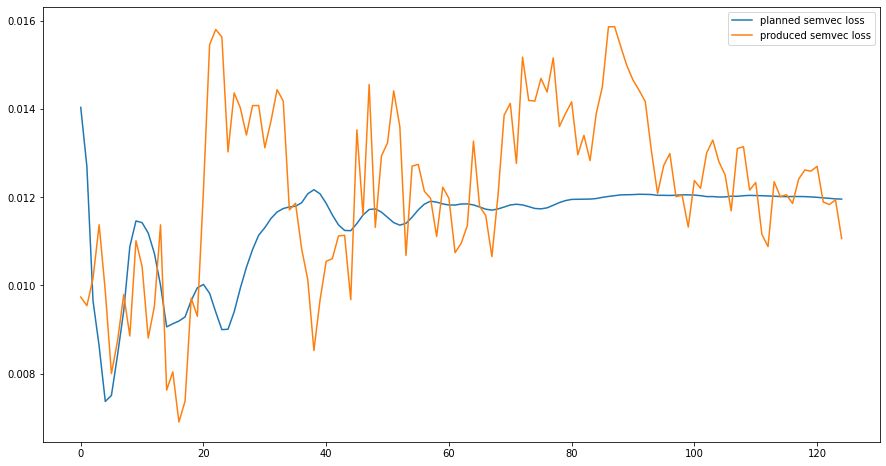

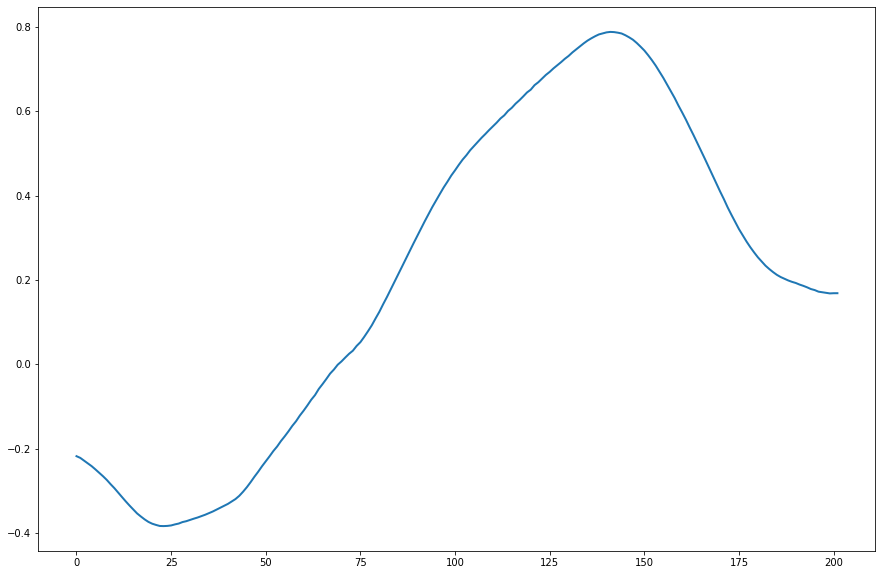

In [11]:
for i, file in enumerate(unplanned_files):
    i += 168
    target_acoustic = file #path + "/" + file
    save_file = f"{SAVE_DICT}/{os.path.dirname(file).split('/')[-1]}/{os.path.basename(file)[:-5]}"
    
    results = paule_model.plan_resynth(learning_rate_planning=0.01,
            learning_rate_learning=0.001,
            target_acoustic=target_acoustic,
            initialize_from="acoustic",
            objective="acoustic",
            n_outer=5, n_inner=25,
            continue_learning=True,
            add_training_data=False,
            log_ii=1,
            log_semantics=True,
            n_batches=3, batch_size=8, n_epochs=10,
            log_gradients=False,
            plot=True, plot_save_file=save_file, 
            seed=None,
            verbose=True)
    
    # save model and optimizer
    torch.save(paule_model.pred_model, f"{save_file}_{str(i)}_pred_model.pt")
    torch.save(paule_model.pred_optimizer, f"{save_file}_{str(i)}_pred_optimizer.pt")

    # save results without model and optimizer
    with open(f"{save_file}.pkl", 'wb') as pfile:
        pickle.dump(results, pfile)


    # save initial and planned flac
    prod_sr = results.prod_sr
    sig_initial = results.sig_steps[0]
    sf.write(save_file + "_initial.flac", sig_initial, prod_sr)
    prod_sig = results.prod_sig
    sf.write(save_file + "_planned.flac", prod_sig, prod_sr)

    # save svgs
    planned_cp = results.planned_cp
    path = save_file + '_svgs/'
    if not os.path.exists(path):
        os.mkdir(path)
    util.export_svgs(util.inv_normalize_cp(planned_cp), path=path)

    # ffmpeg -r 80 -width 600 -i tract%05d.svg -i planned_0.flac planned_0.mp4
    # /usr/bin/ffmpeg -r 80 -width 600 -i /home/tino/Documents/phd/projects/paule/results/000003-Wissenschaft_svgs/tract%05d.svg -i results/000003-Wissenschaft_planned.flac planned.mp4


    # save loss plot
    fig, ax = plt.subplots(figsize=(15, 8), facecolor="white")
    ax.plot(results.planned_loss_steps, label="planned loss", c="C0")
    ax.legend()
    fig.savefig(f"{save_file}_loss.png")

    fig, ax = plt.subplots(figsize=(15, 8), facecolor="white")
    ax.plot(results.prod_loss_steps, label="produced mel loss", c="C1")
    ax.plot(results.planned_mel_loss_steps, label="planned mel loss", c="C0")
    ax.legend()
    fig.savefig(f"{save_file}_loss_mel.png")

    # save subloss plot
    fig, ax = plt.subplots(figsize=(15, 8), facecolor="white")
    ax.plot(results.vel_loss_steps, label="vel loss", c="C2")
    ax.plot(results.jerk_loss_steps, label="jerk loss", c="C3")
    ax.legend()
    fig.savefig(f"{save_file}_loss_subloss.png")

    # save semvec loss plot
    fig, ax = plt.subplots(figsize=(15, 8), facecolor="white")
    ax.plot(results.pred_semvec_loss_steps, label="planned semvec loss", c="C0")
    ax.plot(results.prod_semvec_loss_steps, label="produced semvec loss", c="C1")
    ax.legend()
    fig.savefig(f"{save_file}_loss_semvec.png")
    
    
    # save cps
    # Vocal Tract CPs   
    fig, ax = plt.subplots(facecolor="white", figsize=(15, 10))
    colors = ["C%d" % i for i in range(19)]

    for i in range(4):
        ax.plot(results.planned_cp[:, i], color=colors[i], ls = 'solid', lw = 2)
        ax.plot(results.initial_cp[:, i], color=colors[i], ls = 'dotted', lw = 4)

    legend_elements = [Line2D([0], [0], color='black', ls="solid", lw=2, label='Planned Cp'),#
                       Line2D([0], [0], color='black',ls ="dotted", lw = 4 , label='Inital CP')]

    ax.set_ylim((-1.1, 1.1))
    plt.legend(handles=legend_elements, fontsize=fontsize_params, bbox_to_anchor=(1.0, 1),frameon = False) 
    ax.tick_params(axis='both', labelsize=fontsize_params)
    ax.set_ylabel('Normalized Position' , fontsize=fontsize_y, labelpad=20)
    ax.set_xlabel('Timestep (2.5ms)' , fontsize=fontsize_x, labelpad=20)  
    plt.title("Vocal Tract Cps: '%s'" % save_file.split("/")[-1], fontsize=18, pad=10)
    fig.savefig(f"{save_file}_vocal_tract_cps.png")

    # Glottis CPs
    fig, ax = plt.subplots(facecolor="white", figsize=(15, 10))
    colors = ["C%d" % i for i in range(19)]

    for i in range(4):
        ax.plot(results.planned_cp[:, 19+i], color=colors[i], ls = 'solid', lw = 2)
        ax.plot(results.initial_cp[:, 19+i], color=colors[i], ls = 'dotted', lw = 4)

    legend_elements = [Line2D([0], [0], color='black', ls="solid", lw=2, label='Planned Cp'),#
                       Line2D([0], [0], color='black',ls ="dotted", lw = 4 , label='Inital CP')]

    ax.set_ylim((-1.1, 1.1))
    plt.legend(handles=legend_elements, fontsize=fontsize_params, bbox_to_anchor=(1.0, 1),frameon = False) 
    ax.tick_params(axis='both', labelsize=fontsize_params)
    ax.set_ylabel('Normalized Position' , fontsize=fontsize_y, labelpad=20)
    ax.set_xlabel('Timestep (2.5ms)' , fontsize=fontsize_x, labelpad=20)
    plt.title("Glottis Cps: '%s'" % save_file.split("/")[-1], fontsize=18, pad=10)
    fig.savefig(f"{save_file}_glottis_cps.png")






## Store final losses to txt 

In [8]:
file_names = []
with open(SAVE_DICT + '/results_loss.txt', 'w') as txt:
    for dic in os.listdir(SAVE_DICT):
        if ".DS_Store" in dic:
            continue
        else:
            path = os.path.join(SAVE_DICT,dic)
            if os.path.isdir(path):
                for file in os.listdir(path):
                    if ".pkl" in file: 
                        with open(os.path.join(path,file), 'rb') as f:
                            results = pickle.load(f)
                            file_name = "_".join(file.split("_")[:-1])
                            prod_mel_loss = results.prod_loss_steps[-1]
                            pred_mel_loss = results.planned_mel_loss_steps[-1]
                            vel_loss = results.vel_loss_steps[-1]
                            jerk_loss = results.jerk_loss_steps[-1]
                        file_names.append(file_name)    
                        txt.write(file_name + ": %.5f %.5f %.5f %.5f\n" % (prod_mel_loss, pred_mel_loss, vel_loss, jerk_loss))

# Plot Model Loss for continued learning 

In [ ]:
model_loss = []
with open(SAVE_DICT + '/results_loss.txt', 'w') as txt:
    for dic in os.listdir(SAVE_DICT):
        if ".DS_Store" in dic:
            continue
        else:
            path = os.path.join(SAVE_DICT,dic)
            if os.path.isdir(path):
                for file in os.listdir(path):
                    if ".pkl" in file: 
                        with open(os.path.join(path,file), 'rb') as f:
                            results = pickle.load(f)
                            model_loss += list(results.model_loss)#results[21]

In [ ]:
fig, ax = plt.subplots(figsize = (15,8), facecolor = "white")
ax.plot(model_loss, label = "model loss", c = "C0")
#ax.plot(range(len(model_loss)),np.repeat(np.mean(model_loss),len(model_loss)) ,c = "C1")
ax.legend()

# Data Wrangling with Final Results

In [ ]:
final_results = pd.DataFrame(columns=['file_name','label', 'planned_cp', 'initial_cp', 'target_sig','initial_sig', 'prod_sig', 'target_mel', 
                                      'initial_mel','prod_mel','pred_mel', 'prod_mel_loss', 'pred_mel_loss', 'vel_loss', 'jerk_loss',
                                     'prod_semvec','pred_semvec','prod_semvec_loss', 'pred_semvec_loss'])
ix = 0

for dic in os.listdir(SAVE_DICT):
    if ".DS_Store" in dic:
        continue
    else:
        path = os.path.join(SAVE_DICT,dic)
        if os.path.isdir(path):
            for file in os.listdir(path):
                if ".pkl" in file: 
                    with open(os.path.join(path,file), 'rb') as f:
                        results = pickle.load(f)
                        
                        file_name = "_".join(file.split("_")[:-1])
                        label=file.split("_")[-1][:-4]
                        planned_cp = results.planned_cp
                        initial_cp = results.initial_cp
                        target_sig = results.target_sig
                        prod_sig = results.prod_sig
                        target_mel = results.target_mel
                        
                        initial_sig, sr = speak(inv_normalize_cp(initial_cp))
                        initial_mel = librosa_melspec(initial_sig, sr)
                        initial_mel = normalize_mel_librosa(initial_mel)
                        prod_mel = results.prod_mel
                        pred_mel = results.pred_mel
                        prod_mel_loss = results.prod_loss_steps[-1]
                        pred_mel_loss = results.planned_mel_loss_steps[-1]
                        vel_loss = results.vel_loss_steps[-1]
                        jerk_loss = results.jerk_loss_steps[-1]
                        prod_semvec = results.prod_semvec_steps.[-1]
                        pred_semvec = results.pred_semvec_steps[-1]
                        prod_semvec_loss = results.prod_semvec_loss_steps[-1]
                        pred_semvec_loss = results.pred_semvec_loss_steps[-1]
                        
                        
                        final_results.loc[ix] = [file_name,label,planned_cp,inv_cp,target_sig,initial_sig,prod_sig,target_mel,initial_mel,prod_mel,
                                                pred_mel,prod_mel_loss,pred_mel_loss,vel_loss,jerk_loss,prod_semvec,
                                                pred_semvec,prod_semvec_loss,pred_semvec_loss]
                        ix+=1

In [ ]:
final_results.to_pickle(SAVE_DICT+"/final_results.pkl", protocol=4)